In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
!pip install ultralytics==8.0.196

In [ ]:
from ultralytics import YOLO
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()



Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (AMD EPYC 7B12)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 30.0/225.8 GB disk)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image


In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/bocekTespiti/bestyolov8n-4000.pt conf=0.25 source= "/content/drive/MyDrive/Ekran görüntüsü 2024-06-02 013342.png"

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (AMD EPYC 7B12)
Model summary (fused): 168 layers, 3007013 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/Ekran görüntüsü 2024-06-02 013342.png: 512x640 (no detections), 75.4ms
Speed: 14.1ms preprocess, 75.4ms inference, 0.6ms postprocess per image at shape (1, 3, 512, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


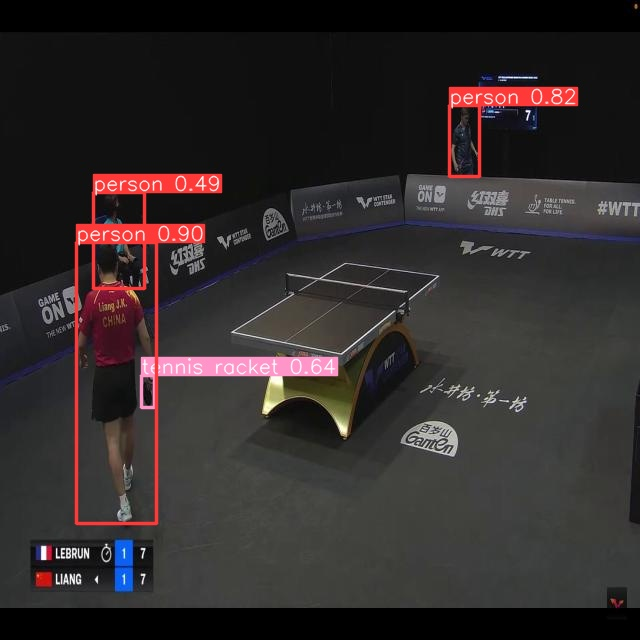

In [ ]:
Image(filename="/content/runs/detect/predict/ITTHungary_R32_220714_LIANG-Jingkun-3-Alexis-LEBRUN-1-_5_jpg.rf.6e4232c9335b14190fdd44252f23fcbb.jpg",height=640)

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ImxMauUX41hTySVncMrO")
project = rf.workspace("pest-tespiti").project("tarimtek")
version = project.version(17)
dataset = version.download("yolov8")



loading Roboflow workspace...
loading Roboflow project...


In [ ]:
import yaml

# YAML dosyasının yolu
yaml_file = '/content/TarimTek-17/data.yaml'
# YAML dosyasını oku
with open(yaml_file, 'r', encoding='utf-8') as file:
    data = yaml.safe_load(file)

# 'test' değişkenini değiştir
data['test'] = '/content/TarimTek-17/test/images'
data['train'] = '/content/TarimTek-17/train/images'
data['val'] = '/content/TarimTek-17/valid/images'

# YAML dosyasını yaz
with open(yaml_file, 'w', encoding='utf-8') as file:
    yaml.safe_dump(data, file, allow_unicode=True)

print("Değişiklik yapıldı.")


Değişiklik yapıldı.


In [ ]:
!pip install -U ultralytics
!yolo task=detect mode=train model=yolov8n.pt data="/content/TarimTek-17/data.yaml" epochs=10 imgsz=640 plots=True

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.6/779.6 kB 10.7 MB/s eta 0:00:00
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.196
    Uninstalling ultralytics-8.0.196:
      Successfully uninstalled ultralytics-8.0.196


100% 6.23M/6.23M [00:00<00:00, 22.4MB/s]
Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (AMD EPYC 7B12)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/TarimTek-17/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, sh

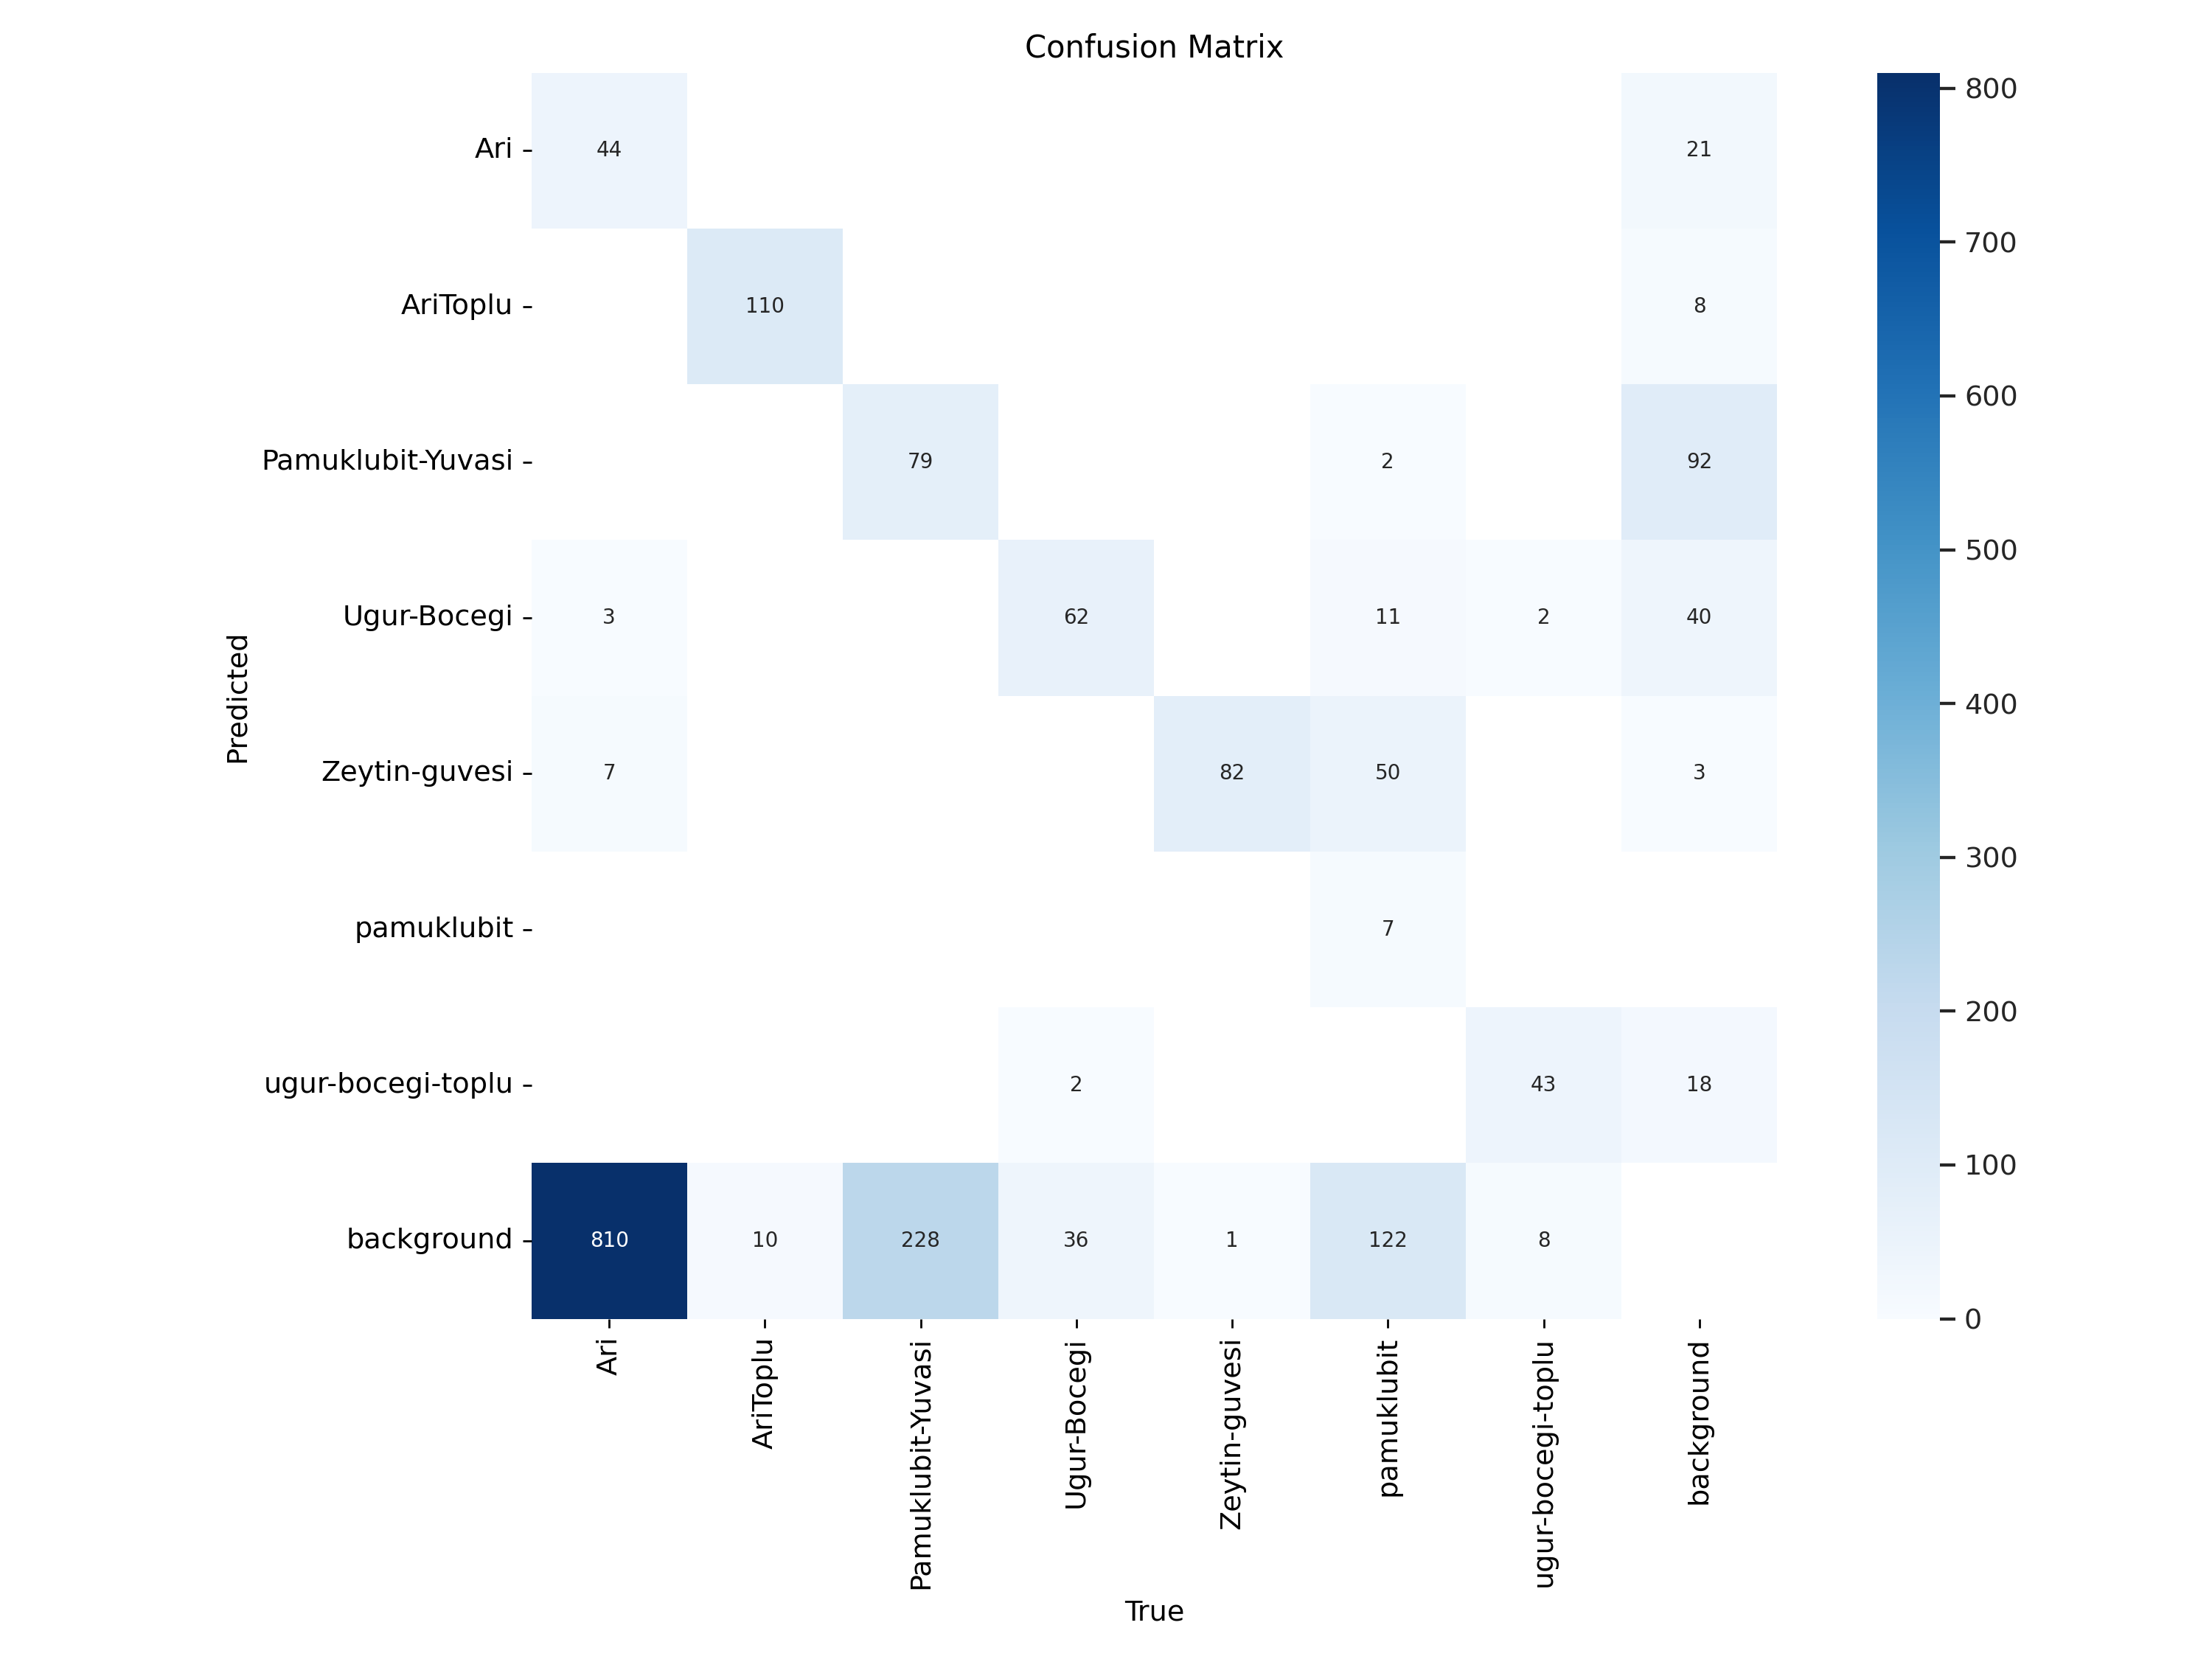

In [ ]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

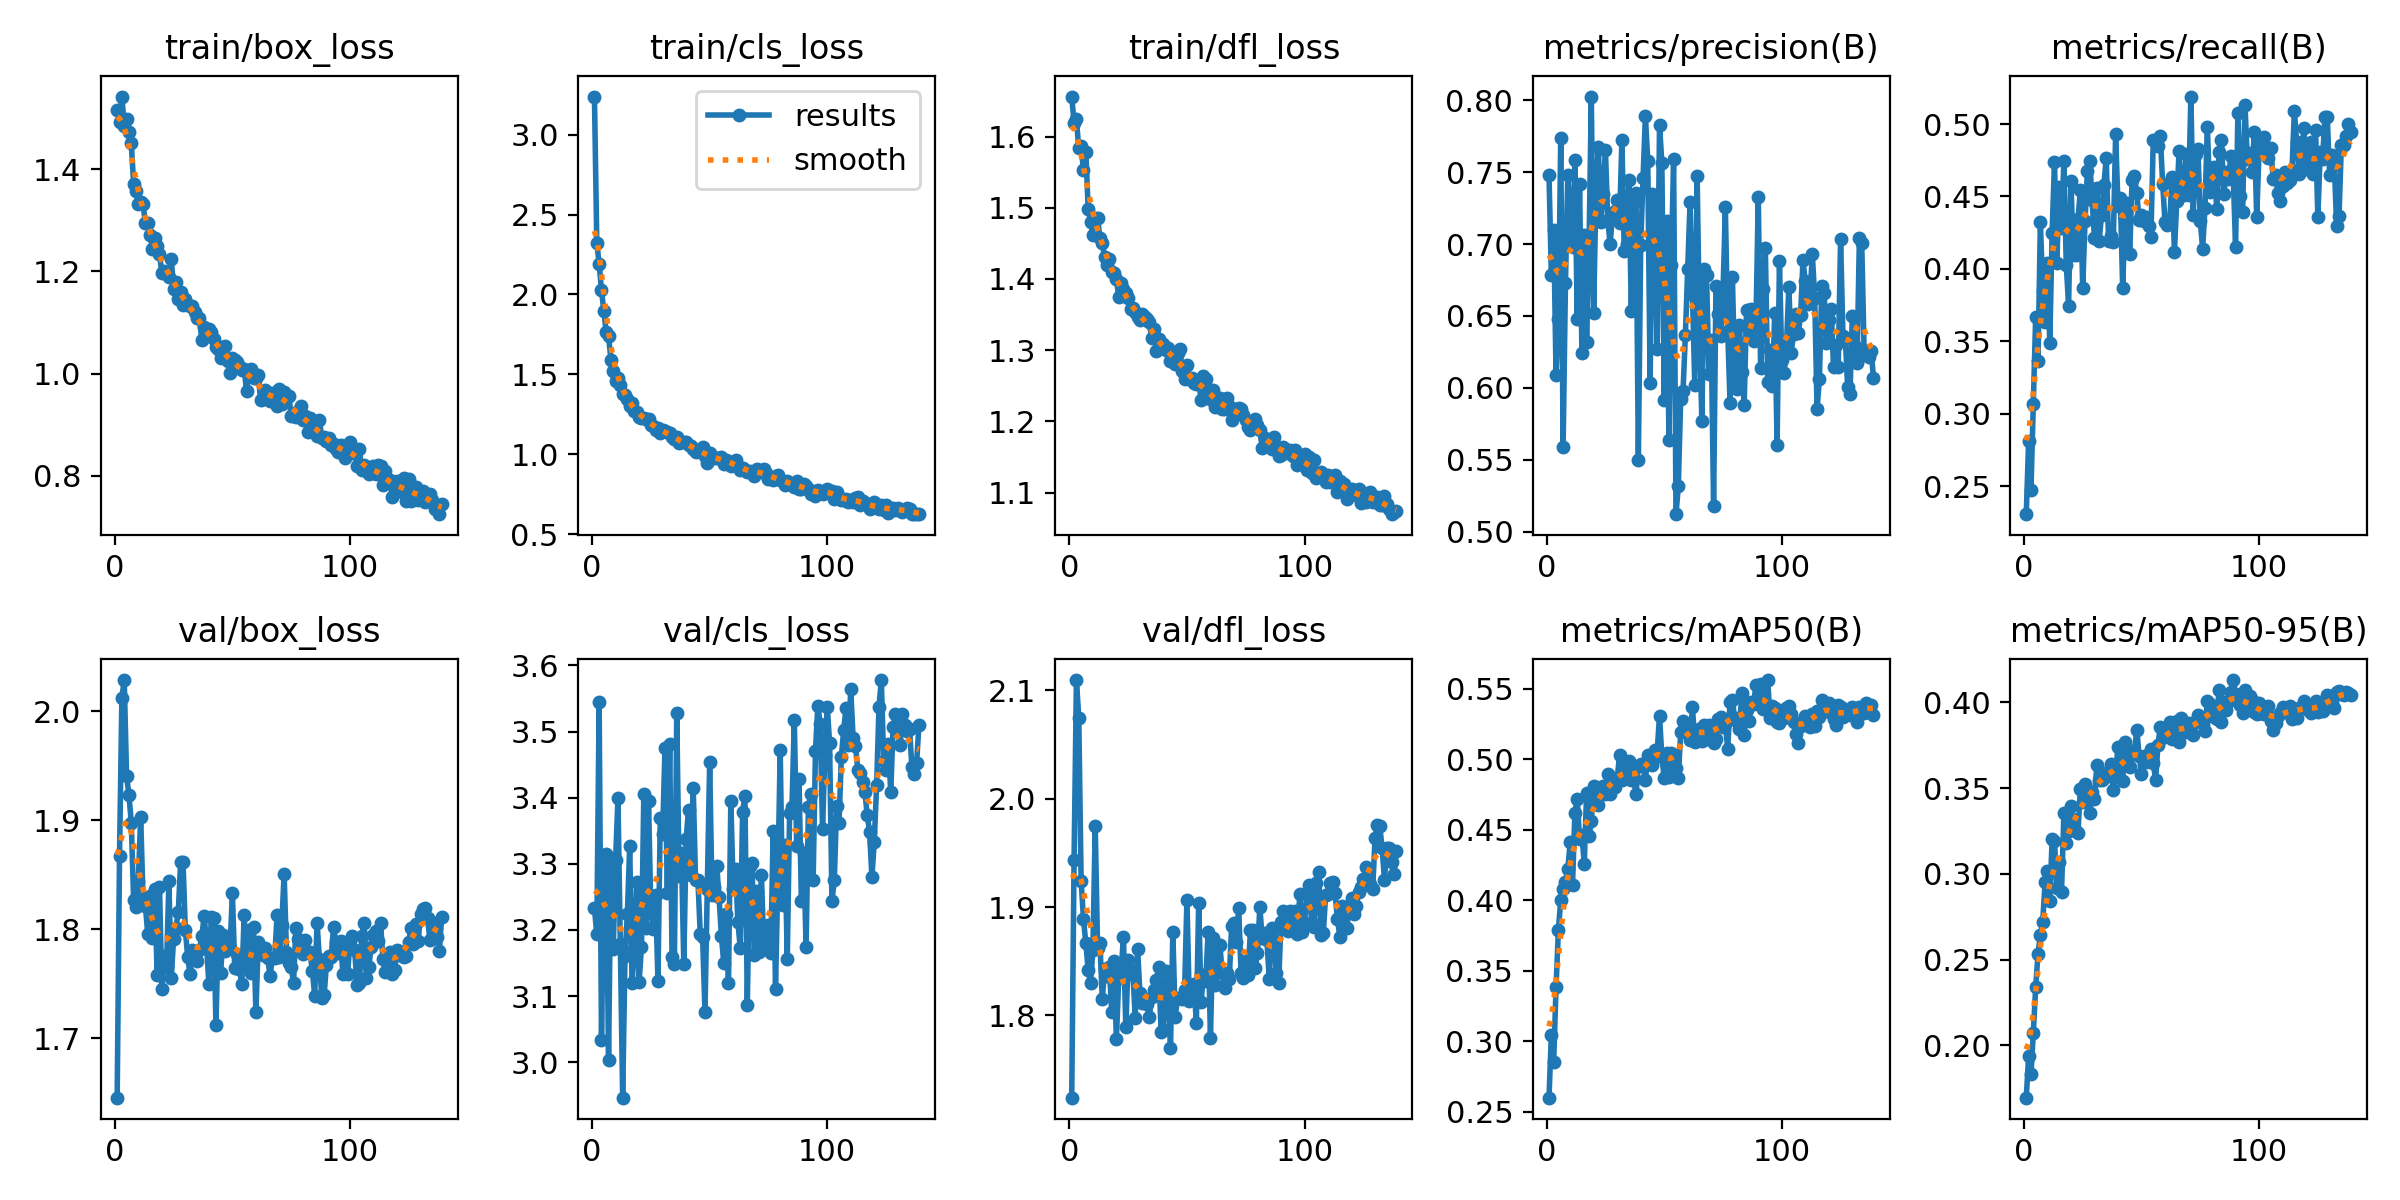

In [ ]:
Image(filename=f'/content/runs/detect/train4/results.png', width=600)


In [ ]:
!yolo task=detect mode=val model= /content/runs/detect/train4/weights/best.pt data=/content/TarimTek-15/data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 3007013 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/TarimTek-15/valid/labels.cache... 632 images, 0 backgrounds, 0 corrupt: 100% 632/632 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  40% 16/40 [00:04<00:02,  9.55it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 40/40 [00:08<00:00,  4.80it/s]
                   all        632       1719       0.64      0.464      0.552      0.414
          

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train4/weights/best.pt conf=0.25 source=/content/TarimTek-15/test/images save=True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 3007013 parameters, 0 gradients, 8.1 GFLOPs

image 1/197 /content/TarimTek-15/test/images/000051_jpg.rf.a7b8b7ed374b40e8f0331b966b5ef171.jpg: 640x640 2 Zeytin-guvesis, 7.0ms
image 2/197 /content/TarimTek-15/test/images/000051_jpg.rf.d9732de5728778d7036c29014c76f74f.jpg: 640x640 2 Zeytin-guvesis, 7.3ms
image 3/197 /content/TarimTek-15/test/images/000053_jpg.rf.2504268e0e954e29d489e442e5da97b0.jpg: 640x640 1 Zeytin-guvesi, 6.7ms
image 4/197 /content/TarimTek-15/test/images/000053_jpg.rf.2639d2e2cee5fc7aaf4e5afe42ced37a.jpg: 640x640 1 Zeytin-guvesi, 7.0ms
image 5/197 /content/TarimTek-15/test/images/000056_jpg.rf.4487b63c725950c6a9bd3ae20b7d0390.jpg: 640x640 1 Zeytin-guvesi, 6.5ms
image 6/197 /content/TarimTek-15/test/images/000056_jpg.rf.59d54f2e707bbee8656d1d7396a260ba.jpg: 640x640 1 Zeytin-guvesi, 6.5ms
image 7/197 /content/TarimTek-15/test/images/000058_jpg.rf.3c

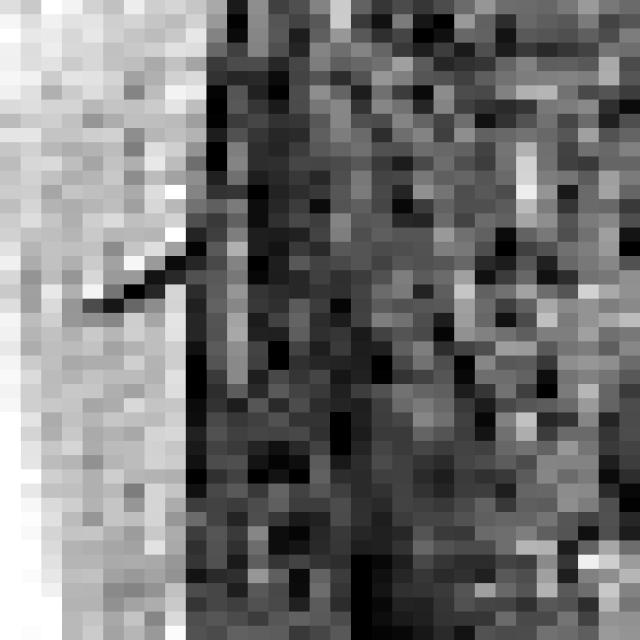

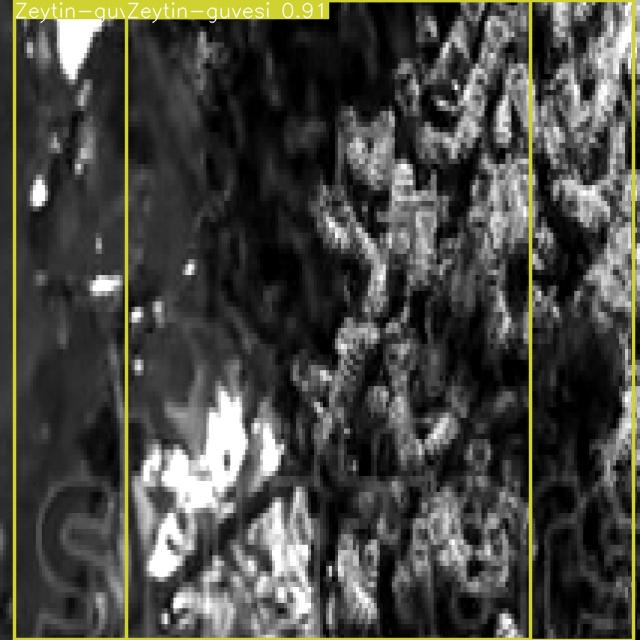

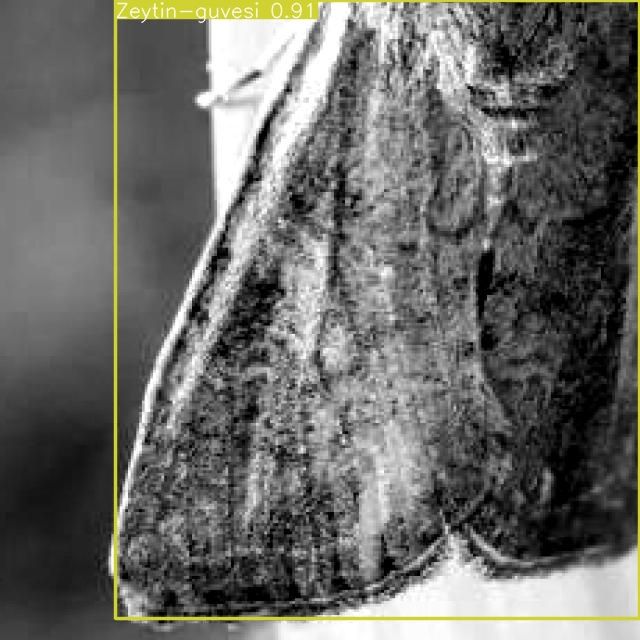

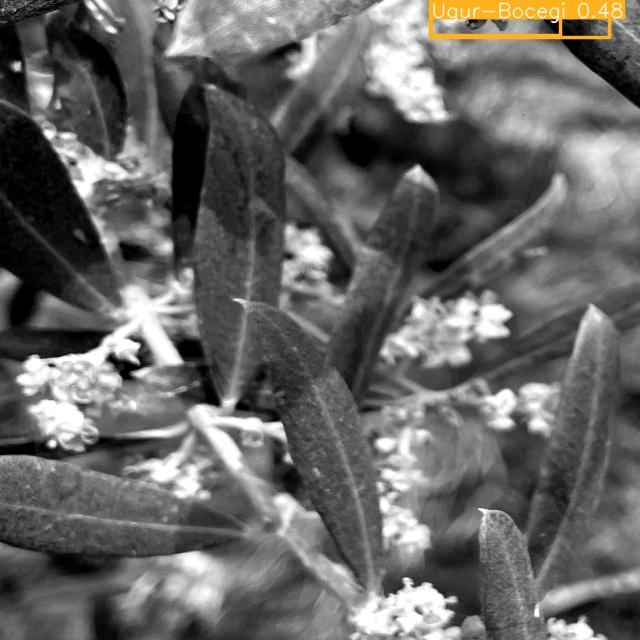

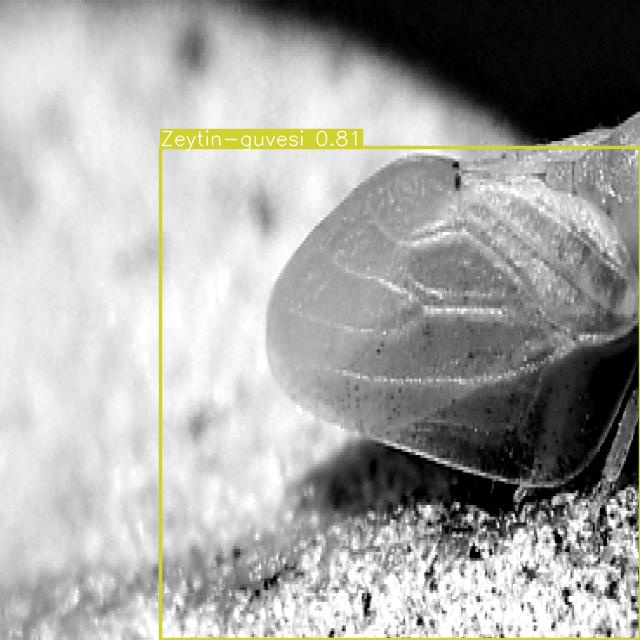

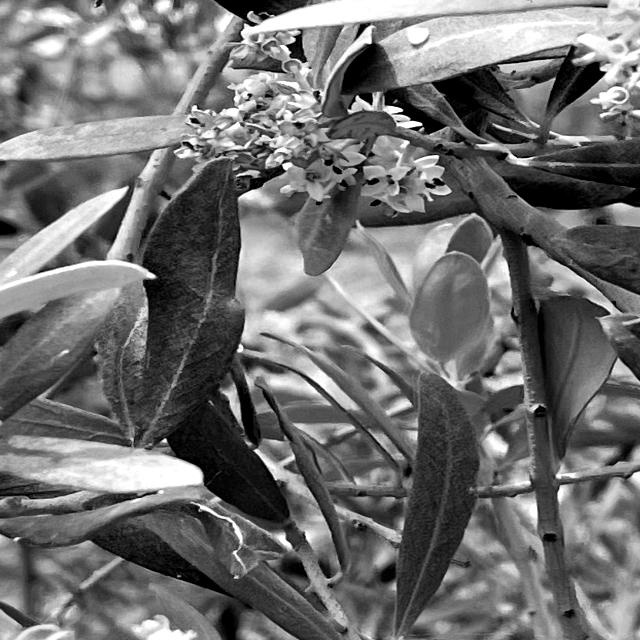

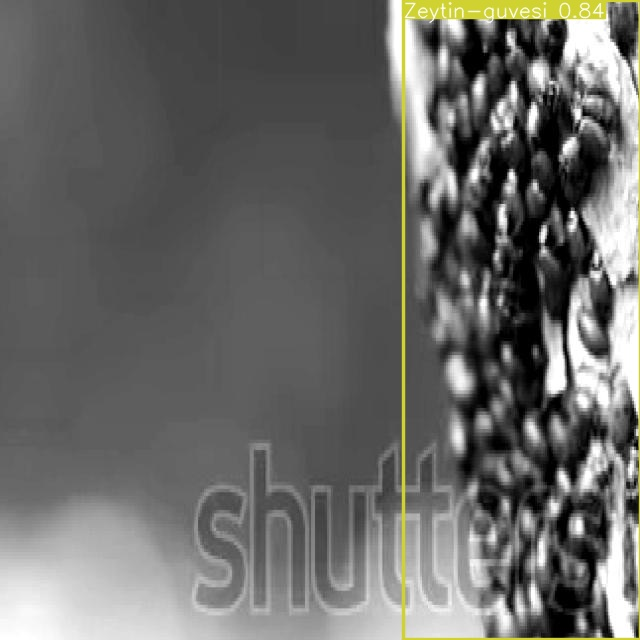

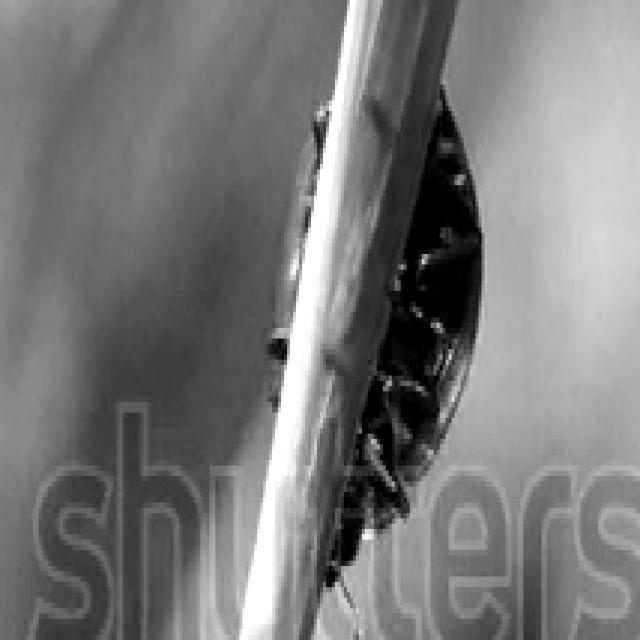

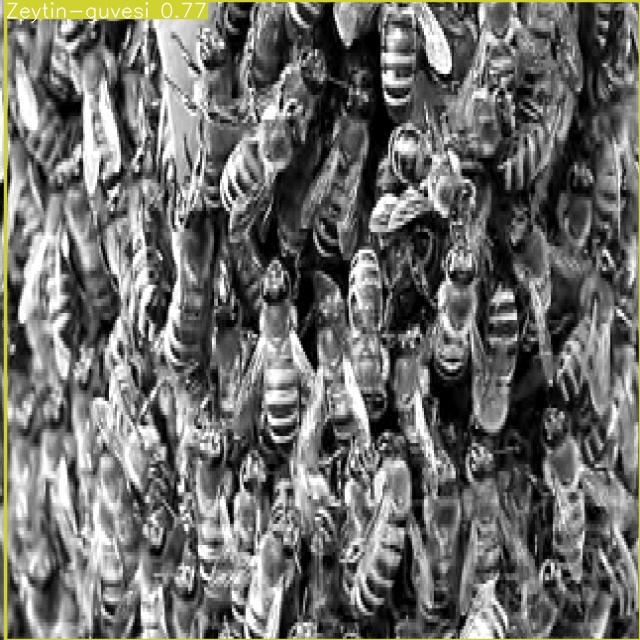

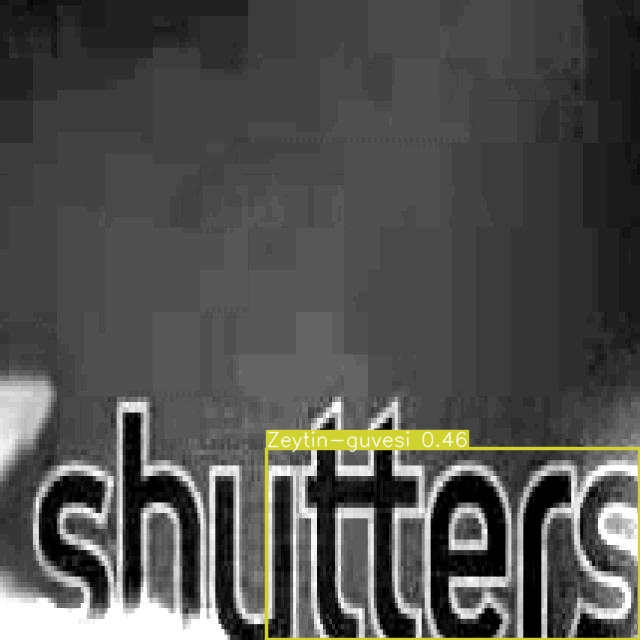

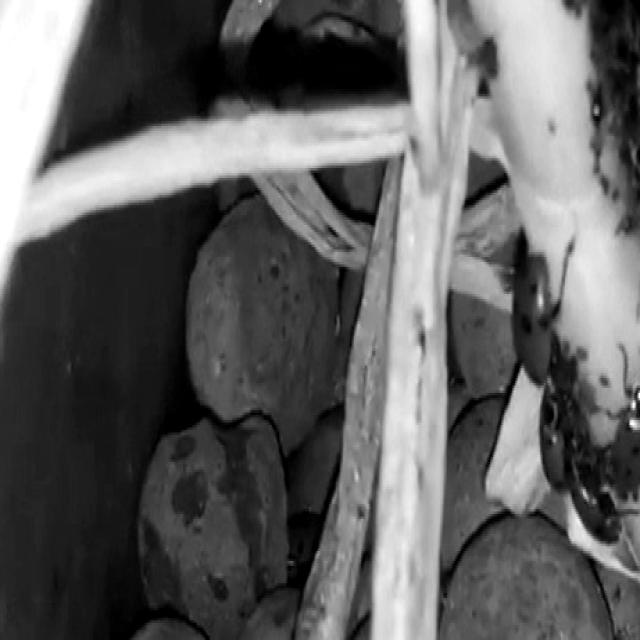

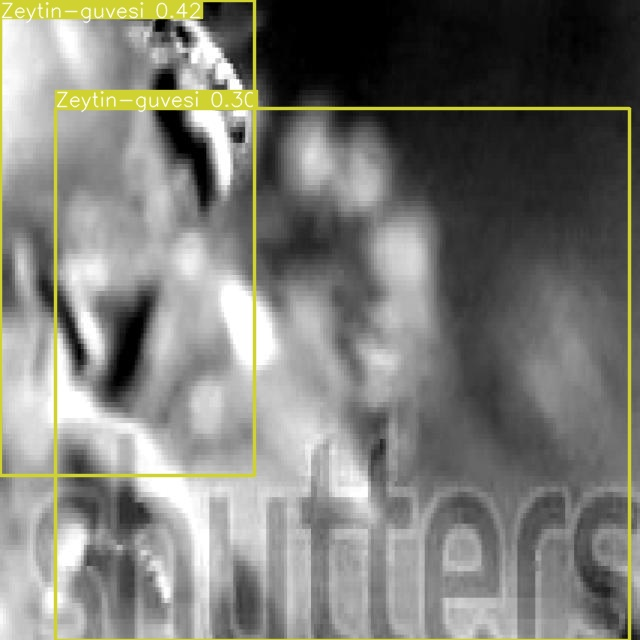

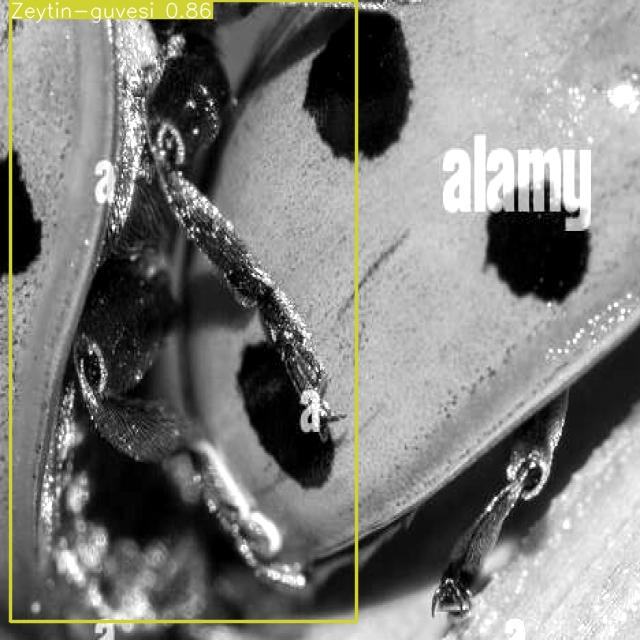

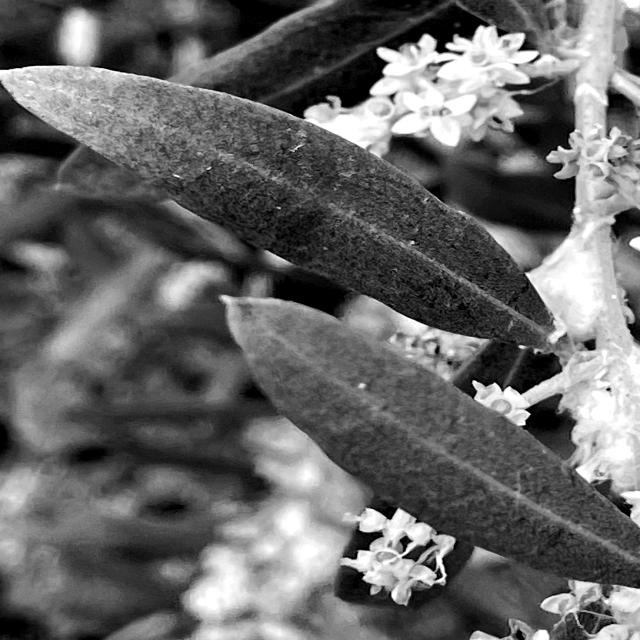

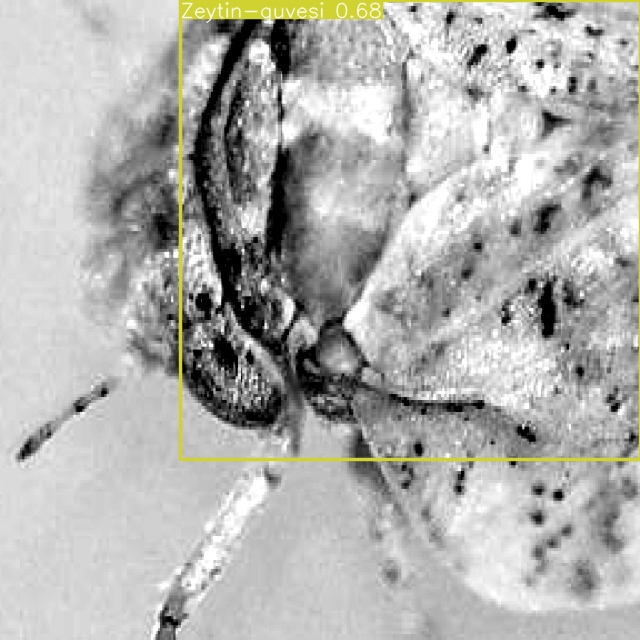

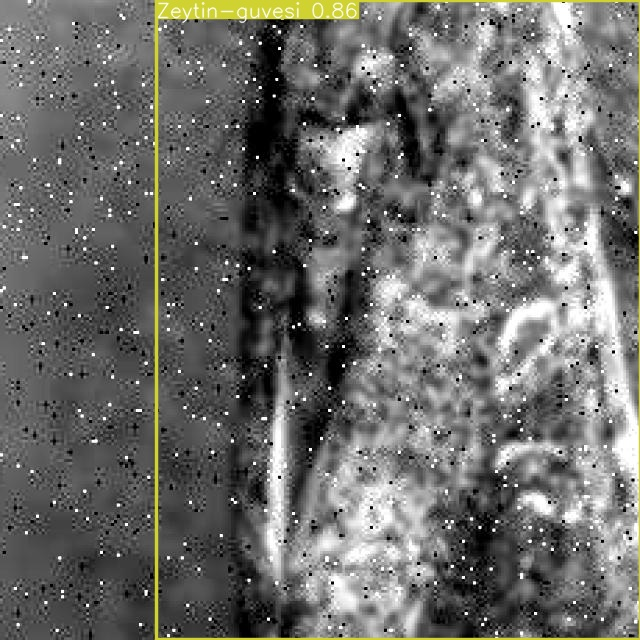

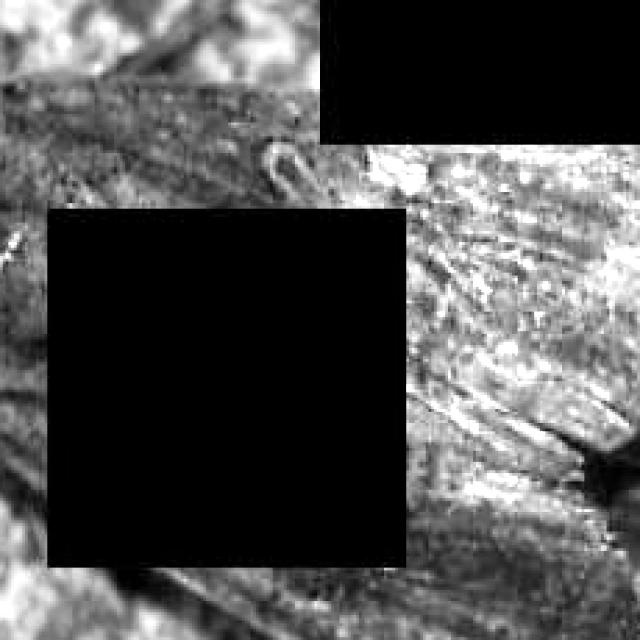

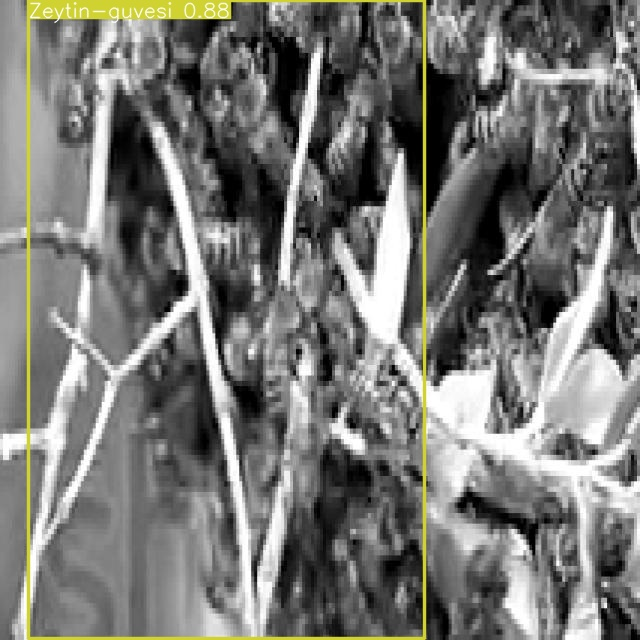

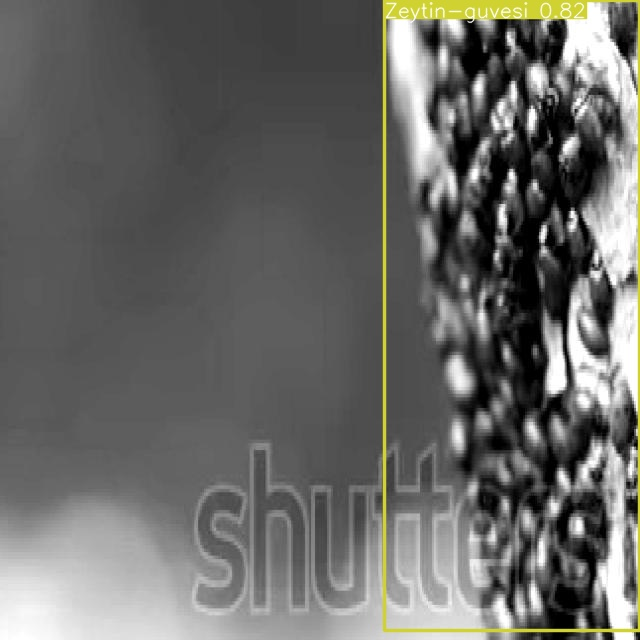

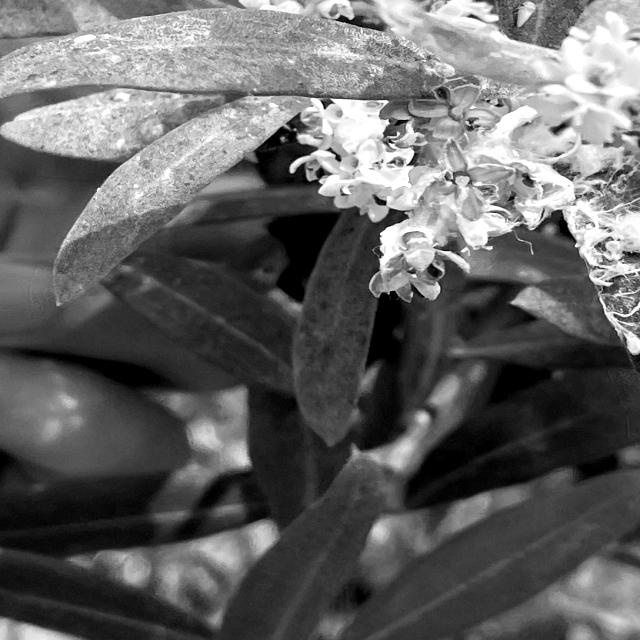

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict8/*.jpg')[40:60]:
      display(Image(filename=image_path, width=500))
      print("\n")

In [ ]:
!pip install opencv-python-headless torch torchvision numpy
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install ultralytics
!pip install opencv-python-headless

In [ ]:
import cv2
from ultralytics import YOLO
#from google.colab.patches import cv2_imshow  # Use cv2_imshow for displaying images in Colab
#import numpy as np

# Load the YOLOv8 model
model = YOLO("/content/drive/MyDrive/bocekTespiti/bestyolov8n-4000.pt")  # Update with the path to your trained model

# Open the video file
video_path = "/content/drive/MyDrive/bocekTespiti/ladybug1.mp4"  # Update with the path to your video file
cap = cv2.VideoCapture(video_path)

# Get video details
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Define the codec and create a VideoWriter object to save the output video
output_path = "/content/drive/MyDrive/bestyolov8n4000-_ladybug1.mp4"  # Update with the path to save the output video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for .mp4 file
out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Perform object detection on the frame
    results = model(frame)

    # Annotate the frame
    for result in results:
        boxes = result.boxes
        for box in boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            conf = box.conf[0]
            cls = int(box.cls[0])
            label = f"{model.names[cls]} {conf:.2f}"
            # Draw the box
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            # Put the label
            cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Write the annotated frame to the output video
    out.write(frame)

    # Display the frame with detections (optional)
    #cv2_imshow(frame)
    #if cv2.waitKey(1) & 0xFF == ord('q'):
     #   break

# Release the video capture and writer objects
cap.release()
out.release()
cv2.destroyAllWindows()
